<a href="https://colab.research.google.com/github/orlandojsjunior/Data_Science/blob/main/Analise_exploratoria/Notebooks/02_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Dados-e-visualizacoes/Dados/ratings.csv"

notas = pd.read_csv(URL)
notas.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape


(100836, 4)

In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [7]:
notas.nota.head()


0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

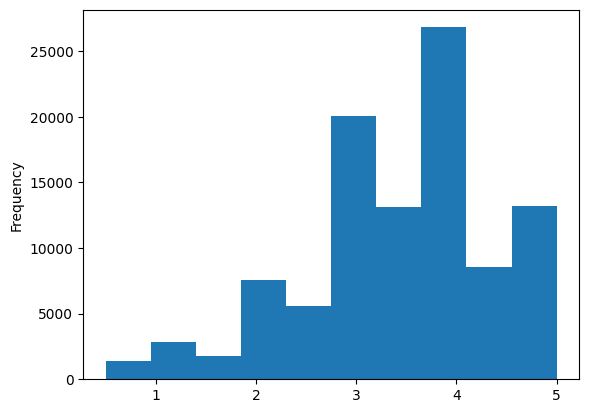

In [8]:
notas.nota.plot(kind='hist')

Descreve outras medidas de descrição dos dados

In [9]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

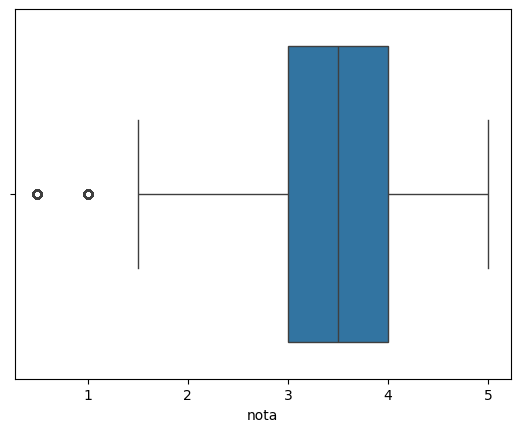

In [10]:
import seaborn as sns

sns.boxplot(x=notas.nota)

In [11]:
import pandas as pd


In [12]:
URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Analise_exploratoria/Dados/movies.csv"

filmes = pd.read_csv(URL)

filmes.columns = ["filmesId", "titulo", "genero"]

filmes.head()

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
